In [1]:
import pandas as pd
import os 
import shutil
import json
import time 
from datetime import timedelta
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
start = time.time()
count = 0
df_all = pd.DataFrame() 
data_root = '/data/transfg/2_55_experiment/make_data/완성데이터/라벨링데이터' 
data_root2 = '/data/transfg/2_55_experiment/make_data/완성데이터/원천데이터'
road_3 = os.listdir(f'{data_root}/차종외관인식') # 교차로, 이면도로, 접근로
for i in road_3: 
    road_detail = os.listdir(f'{data_root}/차종외관인식/{i}')
    for j in tqdm(road_detail):
        road_num = os.listdir(f'{data_root}/차종외관인식/{i}/{j}')
        for k in road_num: 
            json_file_list = os.listdir(f'{data_root}/차종외관인식/{i}/{j}/{k}') 
            for l in json_file_list:
                try:
                    path = os.path.join(f'{data_root}/차종외관인식/{i}/{j}/{k}/{l}')
                    with open(path,'r', encoding="UTF-8") as dc:
                        data = json.load(dc) 
                        df = pd.DataFrame(data['Learning Data Info']['annotations']) 
                        df['path'] = data['Learning Data Info']['path']  
                        df['json_data_id'] = data['Learning Data Info']['json_data_id']
                        df_all = df_all.append(df)
                        count +=1 
                except:
                    print(os.path.join(f'{data_root}/차종외관인식/{i}/{j}/{k}/{l}'))
end = time.time() 
print("Time elapsed: ", timedelta(seconds=end-start))
count

100%|██████████| 15/15 [00:00<00:00, 494.88it/s]

Time elapsed:  0:00:00.425410


101

In [4]:
df_all = df_all.reset_index(drop=True)

In [6]:
df_all['model_id'].value_counts()

Unknown               62
봉고_봉고 Ⅲ(Unknown)       8
카니발_올 뉴(2014)          8
포터_2(HR)(Unknown)      8
그랜저_IG(2016)           8
                      ..
K9_더(2018)             1
티볼리_에어(2016)           1
코란도_C 뉴(2013)          1
제네시스_더 뉴 G70(2020)     1
A6_C8(2019)            1
Name: model_id, Length: 132, dtype: int64

In [7]:
# 언노운 제외
#unknown = df_all[df_all['model_id'] == 'Unknown']
df_all = df_all[df_all['model_id'] != 'Unknown']

In [8]:
df_all['json_data_id'] = df_all['path']+'/'+df_all['json_data_id']

In [9]:
df_all['json_data_id'] = df_all['json_data_id']+'.jpg'

In [10]:
def edit_coord(x):
    x[2] = x[0]+x[2] 
    x[3] = x[1]+x[3]
    return x

In [11]:
df_all['coord'] = df_all['coord'].apply(lambda x: edit_coord(x))

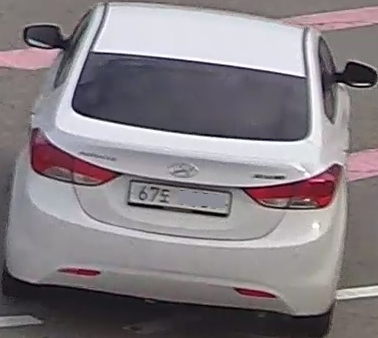

In [12]:
#for i in range(20):
image1 = Image.open(os.path.join(data_root2,'차종외관인식',df_all.iloc[9]['json_data_id']))
image2 = image1.crop(df_all.iloc[9]['coord'])
image2
#    display(image2)

In [13]:
unique_model_list = df_all.drop_duplicates(['brand_id','model_id'])[['brand_id','model_id']]
unique_model_list.head()

,brand_id,model_id
0,미니,쿠퍼_쿠퍼(2001)
1,현대,포터_2(HR)(Unknown)
4,현대,제네시스_EQ900(2015)
5,기아,K8_K8(2021)
6,현대,싼타페_TM(2018)


In [14]:
ouput_path = '/data/transfg/2_55_experiment/datasets/custom'

In [15]:
import os

def makedirs(path):
    try:
        if not os.path.exists(path):
            os.makedirs(path)
    except OSError:
        print("Error: Failed to create the directory.")

In [16]:
start = time.time()
ratio = []
width = [] 
height = []
count = 0
for _,i in tqdm(df_all.iterrows()):
    try:
        count +=1
        image1 = Image.open(os.path.join(f'{data_root2}/차종외관인식',i['json_data_id']))
        image2 = image1.crop(i['coord'])
        folder_path = os.path.join(ouput_path,i['brand_id']+'#'+i['model_id'])
        makedirs(os.path.join(ouput_path,folder_path))
        image2.save(os.path.join(ouput_path,folder_path,i['json_data_id'].split('/')[-1]),'jpeg')
    except:
        print(os.path.join(f'{data_root2}/차종외관인식',i['json_data_id']))

end = time.time() 
print("Time elapsed: ", timedelta(seconds=end-start))

300it [00:28, 10.70it/s]

Time elapsed:  0:00:28.037615


## 같은 사진에 동일 차량 모델이 2개이상일 경우 새로 crop한 사진이 이미 만들어진 사진을 덮어씀
## 따라서 동일 사진에 중복되는 차량만 모아서 추가로 가공진행

In [17]:
df_duplicated = df_all[df_all.duplicated(['brand_id','model_id','path','json_data_id'],keep='last')]

In [18]:
start = time.time()
ratio = []
width = [] 
height = []
count = 0
for _,i in tqdm(df_duplicated.iterrows()):
    try:
        count +=1
        image1 = Image.open(os.path.join(f'{data_root2}/차종외관인식',i['json_data_id']))
        image2 = image1.crop(i['coord'])
        folder_path = os.path.join(ouput_path,i['brand_id']+'#'+i['model_id'])
        makedirs(os.path.join(ouput_path,folder_path))
        image2.save(os.path.join(ouput_path,folder_path,i['json_data_id'].split('/')[-1].split('.jpg')[0]+'_add.jpg'),'jpeg')
    except:
        print(os.path.join(f'{data_root2}/차종외관인식',i['json_data_id']))

end = time.time() 
print("Time elapsed: ", timedelta(seconds=end-start))

3it [00:00, 11.38it/s]

Time elapsed:  0:00:00.265550
